create date wise chat history list only give last 7 days chat history after 7 days create report after that create summary memory of clear 7 days chat history add to another list then monthly summary memory of 7 days chat history so as on

In [10]:
import os
from dotenv import load_dotenv
load_dotenv()

GOOGLE_API_KEY=os.getenv("GEMINI_API_KEY")
os.environ["GOOGLE_API_KEY"]=GOOGLE_API_KEY

GROQ_API_KEY=os.getenv("GROQ_API_KEY")
os.environ["GROQ_API_KEY"]=GROQ_API_KEY

In [3]:
chat_history = []

In [11]:
import requests
import json
from langchain.prompts import PromptTemplate
from langchain.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field

In [12]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm1 = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [6]:
from langchain_core.output_parsers import StrOutputParser

In [44]:
def science_bot(state):
    messages = state["messages"]
    context = messages[-1]
    print(context)
    
    template = """
        You are an AI educational assistant designed to help students by creating detailed study plans, courses, or generating exam-style questions and check answer , provide correct answer based on their input. Use the following details provided by the user to generate a response tailored to their request.
        extract parameters from context and "Strictly ignore the Answer part from the context you have nothing to do with that" .
        ### context: {context}
        
        ### Strictly follow latext format conversion from command to symbols to represent symbols , mathematical term or equation visually which helps to students to understand.
        ### Strictly dont do any websearch .
        
        ### Instructions:
        1. **If the query or question asks to "create a course" or "create a study plan" ** (e.g., "Create a course on...", "Create a study plan for..."):
        - Design a detailed course or study plan based on the provided subject, topic, and difficulty level/class.
        - Include the following sections in your response:
            - **Overview**: A brief introduction to the course/study plan.
            - **Duration**: Suggested time frame (e.g., 1 week, 1 month).
            - **Learning Objectives**: 3-5 specific goals for the student.
            - **Schedule/Structure**: A breakdown of topics/subtopics with suggested time allocations (e.g., daily or weekly tasks).
            - **resources**: A list of resources strictly only book etc.
    
        - Keep the content appropriate for the specified difficulty level or class (e.g., beginner, intermediate, advanced, or grade level).

        2. **If the query asks to "create questions" or "generate exam questions"** (e.g., "Create MCQs for...", "Generate descriptive questions on...", "create numerical questions on..."):
        - Generate 10-15 questions based on the subject, topic, difficulty level/class, and specified question type (e.g., MCQ, descriptive, short answer).
        - For MCQs:
            - Provide 4 answer options (a, b, c, d) with no answer  marked.
        - For descriptive questions:
            - Ensure the questions require detailed explanations or reasoning.
        - Match the complexity to the difficulty level/class provided.
        
        3. **If the query ask for  ask for give tutorial or lecture on topic sub topic, details explanation or reasoning or doubt clearing or solve problems step by step (e.g.,"Find the value of ∫2x cos (x² – 5) with step by step solution", "explain kelvin cycle", "I have doubt or confusion about...")
        - Explain in detail easiest way,give clear concept, give example,derivation , equation, formula, diagram , graph plot if has, , solve problems step by step solution, with fun so that student can understand easily.
        -  give a list of resources, link , book etc.
        
        4. **If the query is unclear or incomplete**:
        - Politely ask for clarification (e.g., "Could you please specify if you want a study plan or questions, and provide more details?").

        5. **General Guidelines**:
        - Keep the tone friendly, encouraging, and educational. make fun with learning
        - Ensure the response is detailed, structured, and directly addresses the query.
        - Adapt the content to the difficulty level or class (e.g., simpler explanations for beginners, advanced concepts for higher levels).

        ### Response Format:
        - Provide your response in clear, well-organized text.
        - Use headings (e.g., ## Overview, ## Learning Objectives) to structure the output.

        ---

        ### Example Inputs and Expected Outputs:
        **Input 1**: 
        - Subject: Mathematics
        - Topic: Algebra
        - Difficulty Level: Intermediate
        - Query: Create a study plan on that topic
        **Output**: A detailed study plan with overview, duration, objectives, schedule, and resources.

        **Input 2**: 
        - Subject: Biology
        - Topic: Cell Structure
        - Difficulty Level: Class 10
        - Question Type: MCQ
        - Query: Generate exam questions
        **Output**: 10-15 multiple-choice questions with options and correct answers.

        
    """
    
    prompt = PromptTemplate(template=template,
                                    input_variables=[context],
                                    partial_variables={}
                                    )
    
    chain =  prompt | llm1 #| StrOutputParser()
    
    response = chain.invoke({"context": context})
    
    return {"messages": [response]}
            
            

In [8]:
state = {"messages": [" create a course on modern physics for class 12"]}

In [9]:
solution = science_bot(state)

 create a course on modern physics for class 12


In [10]:
from IPython.display import display, Markdown
display(Markdown(solution["messages"][0]))

Okay, I can help you create a course on modern physics for class 12! Buckle up, because we're about to dive into the mind-bending world of atoms, relativity, and quantum weirdness!

## Course: Modern Physics for Class 12

### Overview
This course is designed to introduce you to the fascinating realm of modern physics, which revolutionized our understanding of the universe in the 20th century. We'll explore topics like the dual nature of matter and radiation, the structure of atoms and nuclei, and the mind-blowing concepts of special relativity. Get ready to question everything you thought you knew about space, time, and reality!

### Duration
Suggested duration: 4-5 weeks (adjust based on your learning pace)

### Learning Objectives
By the end of this course, you will be able to:
1.  Explain the experimental evidence for the wave-particle duality of matter and radiation.
2.  Describe the structure of atoms and nuclei, including the properties of elementary particles.
3.  Apply the principles of special relativity to solve problems involving time dilation, length contraction, and relativistic momentum and energy.
4.  Understand the basic principles of quantum mechanics and their applications in modern technology.
5.  Solve numerical problems related to modern physics concepts.

### Schedule/Structure

**Week 1: Introduction to Modern Physics & Particle Nature of Radiation**

*   **Day 1:**
    *   **Topic:** Introduction to Modern Physics - What is it and why do we study it?
    *   **Subtopics:** Limitations of classical physics, need for new theories.
    *   **Activities:** Read introductory chapter, watch a documentary on the history of modern physics.
*   **Day 2:**
    *   **Topic:** Photoelectric Effect
    *   **Subtopics:** Hertz's observations, Einstein's explanation, laws of photoelectric emission.
    *   **Activities:** Solve numerical problems on photoelectric effect.
*   **Day 3:**
    *   **Topic:** Wave-Particle Duality of Light
    *   **Subtopics:** Planck's quantum theory, photons, energy and momentum of photons.
    *   **Activities:** Compare and contrast wave and particle nature of light.
*   **Day 4:**
    *   **Topic:** Applications of Photoelectric Effect
    *   **Subtopics:** Photocell, solar cells, etc.
    *   **Activities:** Research and present on a specific application.
*   **Day 5:**
    *   **Review & Quiz:** Review all topics covered this week.
    *   **Activities:** Solve practice questions, take a short quiz.

**Week 2: Atomic Structure**

*   **Day 1:**
    *   **Topic:** Alpha-Particle Scattering and Rutherford's Nuclear Model of Atom
    *   **Subtopics:** Observations, Rutherford's model, drawbacks.
    *   **Activities:** Analyze Rutherford's experiment and its implications.
*   **Day 2:**
    *   **Topic:** Bohr Model of the Hydrogen Atom
    *   **Subtopics:** Postulates, energy levels, spectra of hydrogen atom.
    *   **Activities:** Derive the Bohr's quantization condition.
*   **Day 3:**
    *   **Topic:** Limitations of Bohr's Model
    *   **Subtopics:** Failure to explain complex atoms, fine structure, etc.
    *   **Activities:** Discuss the shortcomings of the Bohr model.
*   **Day 4:**
    *   **Topic:** X-rays
    *   **Subtopics:** Production, properties, continuous and characteristic X-rays.
    *   **Activities:** Learn about the applications of X-rays in medicine and industry.
*   **Day 5:**
    *   **Review & Quiz:** Review all topics covered this week.
    *   **Activities:** Solve numerical problems, take a quiz.

**Week 3: Nuclei**

*   **Day 1:**
    *   **Topic:** Composition and Size of Nucleus
    *   **Subtopics:** Nuclear constituents, nuclear size and density.
    *   **Activities:** Calculate the density of nuclear matter.
*   **Day 2:**
    *   **Topic:** Mass-Energy and Nuclear Binding Energy
    *   **Subtopics:** Einstein's mass-energy relation, binding energy curve.
    *   **Activities:** Solve problems on mass defect and binding energy.
*   **Day 3:**
    *   **Topic:** Nuclear Force
    *   **Subtopics:** Properties of nuclear force, short range, strong, etc.
    *   **Activities:** Compare and contrast nuclear force with electromagnetic force.
*   **Day 4:**
    *   **Topic:** Nuclear Reactions
    *   **Subtopics:** Nuclear fission and fusion, energy released.
    *   **Activities:** Learn about the applications of nuclear energy.
*   **Day 5:**
    *   **Review & Quiz:** Review all topics covered this week.
    *   **Activities:** Discuss the environmental impact of nuclear energy, take a quiz.

**Week 4: Radioactivity**

*   **Day 1:**
    *   **Topic:** Radioactive Decay Law
    *   **Subtopics:** Alpha, beta, and gamma decay, half-life, decay constant.
    *   **Activities:** Derive the radioactive decay law.
*   **Day 2:**
    *   **Topic:** Nuclear Reactor
    *   **Subtopics:** Components, working principle, types of reactors.
    *   **Activities:** Study the design and safety features of a nuclear reactor.
*   **Day 3:**
    *   **Topic:** Nuclear Weapons
    *   **Subtopics:** Working principle, effects, ethical considerations.
    *   **Activities:** Discuss the dangers of nuclear proliferation.
*   **Day 4:**
    *   **Topic:** Applications of Radioactivity
    *   **Subtopics:** Carbon dating, medical applications, industrial applications.
    *   **Activities:** Present on a specific application of radioactivity.
*   **Day 5:**
    *   **Review & Quiz:** Review all topics covered this week.
    *   **Activities:** Solve numerical problems, take a quiz.

**Week 5: Semiconductor Electronics (If Time Permits)**

*   **Day 1:**
    *   **Topic:** Energy Bands in Solids
    *   **Subtopics:** Conductors, insulators, and semiconductors.
    *   **Activities:** Understand the difference between conductors, insulators, and semiconductors based on band theory.
*   **Day 2:**
    *   **Topic:** Intrinsic and Extrinsic Semiconductors
    *   **Subtopics:** Doping, p-type and n-type semiconductors.
    *   **Activities:** Learn how doping changes the conductivity of semiconductors.
*   **Day 3:**
    *   **Topic:** Semiconductor Diode
    *   **Subtopics:** p-n junction, forward and reverse bias.
    *   **Activities:** Plot the V-I characteristics of a semiconductor diode.
*   **Day 4:**
    *   **Topic:** Applications of Semiconductor Diodes
    *   **Subtopics:** Rectifiers, LEDs, solar cells.
    *   **Activities:** Study the working of a full-wave rectifier.
*   **Day 5:**
    *   **Review & Quiz:** Review all topics covered this week.
    *   **Activities:** Design a simple circuit using diodes, take a quiz.

### Resources

*   **Textbooks:**
    *   NCERT Physics Textbook for Class 12 (Part 2)
    *   Concepts of Physics by H.C. Verma (Vol. 2)
*   **Online Resources:**
    *   Khan Academy (Physics section)
    *   MIT OpenCourseware (Physics courses)
    *   HyperPhysics ([http://hyperphysics.phy-astr.gsu.edu/](http://hyperphysics.phy-astr.gsu.edu/))
*   **YouTube Channels:**
    *   Physics Wallah
    *   Khan Academy Physics
    *   Veritasium (for conceptual understanding)

In [20]:
state = {"messages":["give lecture on modern physics photoelectric effects"]}

In [21]:
solution = science_bot(state)

give lecture on modern physics photoelectric effects


In [45]:
state = {"messages":["create a sin curve"]}

In [47]:
solution = science_bot(state)

create a sin curve


In [48]:
from IPython.display import display, Markdown
display(Markdown(solution["messages"][0].content))

Okay, I will help you understand and create a sine curve. Let's dive in!

## Creating a Sine Curve

### Overview

A sine curve is a fundamental concept in trigonometry and is used extensively in physics, engineering, and mathematics to model periodic phenomena such as waves, oscillations, and alternating current. This tutorial will guide you through understanding the sine function and how to plot it, including its key properties and characteristics.

### Learning Objectives

By the end of this tutorial, you will be able to:

1.  Understand the basic sine function, \( y = \sin(x) \).
2.  Identify the key properties of a sine wave, including amplitude, period, phase shift, and vertical shift.
3.  Plot a sine curve by hand and using computational tools.
4.  Apply transformations to the sine function and observe the resulting changes in the graph.

### Understanding the Sine Function

The sine function, denoted as \( \sin(x) \), relates an angle \( x \) (in radians or degrees) to the ratio of the length of the opposite side to the length of the hypotenuse in a right-angled triangle. In the context of a unit circle (a circle with a radius of 1), \( \sin(x) \) represents the y-coordinate of a point on the circle corresponding to the angle \( x \) measured from the positive x-axis.

### Key Properties of the Sine Wave

1.  **Amplitude (\( A \))**:
    -   The amplitude is the maximum displacement of the wave from its central position. It is the distance from the x-axis to the highest or lowest point on the sine wave.
    -   For a standard sine function \( y = A \sin(x) \), \( A \) is the amplitude.
2.  **Period (\( T \))**:
    -   The period is the length of one complete cycle of the wave. It is the distance along the x-axis over which the function repeats itself.
    -   For a standard sine function \( y = \sin(x) \), the period is \( 2\pi \) radians or 360 degrees.
    -   For a function \( y = \sin(Bx) \), the period \( T \) is given by \( T = \frac{2\pi}{B} \).
3.  **Frequency (\( f \))**:
    -   The frequency is the number of complete cycles per unit of time or distance. It is the reciprocal of the period.
    -   \( f = \frac{1}{T} \)
4.  **Phase Shift (\( \phi \))**:
    -   The phase shift is the horizontal shift of the wave from its standard position.
    -   For a function \( y = \sin(x - \phi) \), \( \phi \) is the phase shift. If \( \phi > 0 \), the wave is shifted to the right; if \( \phi < 0 \), the wave is shifted to the left.
5.  **Vertical Shift (\( D \))**:
    -   The vertical shift is the upward or downward shift of the wave from its central position.
    -   For a function \( y = \sin(x) + D \), \( D \) is the vertical shift. If \( D > 0 \), the wave is shifted upward; if \( D < 0 \), the wave is shifted downward.

### General Form of the Sine Function

The general form of the sine function is:

$$
y = A \sin(B(x - \phi)) + D
$$

Where:

*   \( A \) is the amplitude.
*   \( B \) affects the period \( T = \frac{2\pi}{B} \).
*   \( \phi \) is the phase shift.
*   \( D \) is the vertical shift.

### Plotting the Sine Curve

#### 1. By Hand

To plot a sine curve by hand, follow these steps:

1.  **Determine the key properties**: Identify the amplitude, period, phase shift, and vertical shift from the function.
2.  **Create a table of values**: Choose key points within one period (e.g., \( x = 0, \frac{T}{4}, \frac{T}{2}, \frac{3T}{4}, T \)) and calculate the corresponding \( y \) values.
3.  **Plot the points**: Plot the \( (x, y) \) pairs on a graph.
4.  **Connect the points**: Draw a smooth curve through the points to create the sine wave.
5.  **Extend the curve**: Repeat the pattern to extend the wave over the desired interval.

#### 2. Using Computational Tools

You can use various tools to plot sine curves, such as:

*   **Graphing Calculators**: TI-84, Desmos
*   **Software**: MATLAB, Python (with Matplotlib), Excel

Here’s an example using Python with Matplotlib:

```python
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1      # Amplitude
B = 1      # Frequency (adjusts the period)
phi = 0    # Phase shift
D = 0      # Vertical shift

# Generate x values
x = np.linspace(0, 4*np.pi, 400)  # From 0 to 4*pi

# Calculate y values
y = A * np.sin(B * (x - phi)) + D

# Plot the sine wave
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = sin(x)')
plt.title('Sine Wave')
plt.xlabel('x (radians)')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()
```

This code will generate a basic sine wave plot.

### Transformations of the Sine Function

1.  **Amplitude Change**:
    -   Changing \( A \) stretches or compresses the sine wave vertically.
    -   If \( A > 1 \), the wave is stretched vertically.
    -   If \( 0 < A < 1 \), the wave is compressed vertically.
2.  **Period Change**:
    -   Changing \( B \) compresses or stretches the sine wave horizontally, affecting the period.
    -   If \( B > 1 \), the period decreases, and the wave is compressed horizontally.
    -   If \( 0 < B < 1 \), the period increases, and the wave is stretched horizontally.
3.  **Phase Shift**:
    -   Changing \( \phi \) shifts the sine wave horizontally.
    -   If \( \phi > 0 \), the wave shifts to the right.
    -   If \( \phi < 0 \), the wave shifts to the left.
4.  **Vertical Shift**:
    -   Changing \( D \) shifts the sine wave vertically.
    -   If \( D > 0 \), the wave shifts upward.
    -   If \( D < 0 \), the wave shifts downward.

### Examples

1.  **Example 1: \( y = 2\sin(x) \)**
    -   Amplitude: \( A = 2 \)
    -   Period: \( T = 2\pi \)
    -   Phase Shift: \( \phi = 0 \)
    -   Vertical Shift: \( D = 0 \)
    -   This sine wave has an amplitude of 2, meaning it oscillates between -2 and 2.
2.  **Example 2: \( y = \sin(2x) \)**
    -   Amplitude: \( A = 1 \)
    -   Period: \( T = \frac{2\pi}{2} = \pi \)
    -   Phase Shift: \( \phi = 0 \)
    -   Vertical Shift: \( D = 0 \)
    -   This sine wave has a period of \( \pi \), meaning it completes one cycle in half the distance compared to \( y = \sin(x) \).
3.  **Example 3: \( y = \sin(x - \frac{\pi}{4}) \)**
    -   Amplitude: \( A = 1 \)
    -   Period: \( T = 2\pi \)
    -   Phase Shift: \( \phi = \frac{\pi}{4} \)
    -   Vertical Shift: \( D = 0 \)
    -   This sine wave is shifted to the right by \( \frac{\pi}{4} \) radians.
4.  **Example 4: \( y = \sin(x) + 1 \)**
    -   Amplitude: \( A = 1 \)
    -   Period: \( T = 2\pi \)
    -   Phase Shift: \( \phi = 0 \)
    -   Vertical Shift: \( D = 1 \)
    -   This sine wave is shifted upward by 1 unit.

### Resources

*   **Books**:
    *   "Trigonometry" by Ted Sundstrom and Steven Schlicker
    *   "Calculus" by James Stewart
*   **Online Resources**:
    *   Khan Academy: Trigonometry
    *   Paul's Online Math Notes: Trigonometry

### Conclusion

Understanding and creating sine curves is essential for many areas of science and engineering. By mastering the basic sine function and its transformations, you can model and analyze a wide range of periodic phenomena. Keep practicing with different parameters to deepen your understanding and skills!

In [49]:
llm1.invoke("create a sin curve")

AIMessage(content='```python\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# 1. Generate x values (angles in radians)\nx = np.linspace(0, 2*np.pi, 100)  # From 0 to 2*pi (one full cycle) with 100 points\n\n# 2. Calculate the sine values\ny = np.sin(x)\n\n# 3. Create the plot\nplt.plot(x, y)\n\n# 4. Add labels and title\nplt.xlabel("Angle (radians)")\nplt.ylabel("sin(x)")\nplt.title("Sine Wave")\n\n# 5. Customize the plot (optional)\nplt.grid(True)  # Add grid lines\nplt.axhline(0, color=\'black\', linewidth=0.5) # Add horizontal line at y=0\nplt.axvline(0, color=\'black\', linewidth=0.5) # Add vertical line at x=0\nplt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],\n           [\'0\', \'π/2\', \'π\', \'3π/2\', \'2π\'])  # Customize x-axis ticks\n\n# 6. Display the plot\nplt.show()\n```\n\nKey improvements and explanations:\n\n* **`import numpy as np` and `import matplotlib.pyplot as plt`**:  These lines import the necessary libraries.  `numpy` is used for numerical calculati

In [23]:
solution

{'messages': [AIMessage(content='Alright, let\'s dive into the fascinating world of the photoelectric effect! Buckle up, because we\'re about to shine some light on this mind-bending concept. ✨\n\n## Lecture: Modern Physics - The Photoelectric Effect\n\n### Overview\n\nThe photoelectric effect is a phenomenon where light (electromagnetic radiation) shines on a material, causing it to emit electrons. These ejected electrons are called photoelectrons. This effect is a cornerstone of quantum mechanics, demonstrating the particle-like nature of light. It\'s like light is throwing tiny electron-sized baseballs at a surface!\n\n### Key Concepts\n\n1.  **Photons:** Light is composed of discrete packets of energy called photons.\n2.  **Work Function (Φ):** The minimum energy required to remove an electron from the surface of a material. Think of it as the electron\'s "escape fee."\n3.  **Threshold Frequency (f₀):** The minimum frequency of light required to eject electrons. If the light\'s fre

In [24]:
from IPython.display import display, Markdown
display(Markdown(solution["messages"][0].content))

Alright, let's dive into the fascinating world of the photoelectric effect! Buckle up, because we're about to shine some light on this mind-bending concept. ✨

## Lecture: Modern Physics - The Photoelectric Effect

### Overview

The photoelectric effect is a phenomenon where light (electromagnetic radiation) shines on a material, causing it to emit electrons. These ejected electrons are called photoelectrons. This effect is a cornerstone of quantum mechanics, demonstrating the particle-like nature of light. It's like light is throwing tiny electron-sized baseballs at a surface!

### Key Concepts

1.  **Photons:** Light is composed of discrete packets of energy called photons.
2.  **Work Function (Φ):** The minimum energy required to remove an electron from the surface of a material. Think of it as the electron's "escape fee."
3.  **Threshold Frequency (f₀):** The minimum frequency of light required to eject electrons. If the light's frequency is below this, no electrons are emitted, no matter how intense the light is!
4.  **Kinetic Energy (KE):** The energy of the emitted electrons.
5.  **Stopping Potential (V₀):** The voltage required to stop the emitted electrons from reaching the collector.

### The Experiment Setup

Imagine a vacuum tube with two metal plates:

*   **Emitter (Cathode):** The plate where light shines and electrons are emitted.
*   **Collector (Anode):** The plate that collects the emitted electrons.

When light of sufficient frequency shines on the emitter, electrons are ejected and travel to the collector, creating a current.

### The Magic Formula

The key equation that governs the photoelectric effect is:

```
E = hf = Φ + KE_max
```

Where:

*   `E` is the energy of the photon.
*   `h` is Planck's constant (approximately 6.626 x 10⁻³⁴ Js).
*   `f` is the frequency of the light.
*   `Φ` is the work function of the material.
*   `KE_max` is the maximum kinetic energy of the emitted electrons.

### Explanation

*   A photon with energy `hf` strikes the metal surface.
*   An amount of energy equal to the work function `Φ` is used to liberate the electron from the metal.
*   The remaining energy appears as the kinetic energy `KE_max` of the emitted electron.

### Important Observations and Implications

1.  **Intensity Doesn't Matter (Below Threshold):** Increasing the intensity of light *below* the threshold frequency does *not* cause electron emission. It's like throwing more pebbles that are too light to knock something over.
2.  **Frequency Matters:** The kinetic energy of the emitted electrons depends on the frequency of the light. Higher frequency means higher kinetic energy.
3.  **Instantaneous Emission:** Electrons are emitted almost instantaneously (within about 10⁻⁹ seconds) after the light shines on the material.
4.  **Einstein's Explanation:** Albert Einstein explained the photoelectric effect in 1905, which earned him the Nobel Prize in Physics in 1921. He proposed that light consists of discrete packets of energy (photons).

### Let's Do a Fun Example!

**Problem:**

A metal has a work function of 2.0 eV. Light with a wavelength of 400 nm shines on the metal. What is the maximum kinetic energy of the emitted electrons?

**Solution:**

1.  **Convert Wavelength to Frequency:**

    *   `c = fλ`, where `c` is the speed of light (3 x 10⁸ m/s) and `λ` is the wavelength.
    *   `f = c / λ = (3 x 10⁸ m/s) / (400 x 10⁻⁹ m) = 7.5 x 10¹⁴ Hz`
2.  **Calculate Photon Energy:**

    *   `E = hf = (6.626 x 10⁻³⁴ Js) x (7.5 x 10¹⁴ Hz) = 4.97 x 10⁻¹⁹ J`
3.  **Convert Work Function to Joules:**

    *   `Φ = 2.0 eV = 2.0 x 1.602 x 10⁻¹⁹ J = 3.204 x 10⁻¹⁹ J`
4.  **Calculate Maximum Kinetic Energy:**

    *   `KE_max = E - Φ = (4.97 x 10⁻¹⁹ J) - (3.204 x 10⁻¹⁹ J) = 1.766 x 10⁻¹⁹ J`
5.  **Convert Kinetic Energy to eV:**

    *   `KE_max = (1.766 x 10⁻¹⁹ J) / (1.602 x 10⁻¹⁹ J/eV) ≈ 1.1 eV`

So, the maximum kinetic energy of the emitted electrons is approximately 1.1 eV.

### Real-World Applications

*   **Photocells:** Used in light meters, automatic doors, and solar panels.
*   **Digital Cameras:** The sensors in digital cameras use the photoelectric effect to convert light into electrical signals.
*   **Medical Imaging:** Used in certain types of medical imaging devices.

### Let's Recap!

*   The photoelectric effect demonstrates the particle nature of light.
*   Light comes in packets called photons.
*   Electrons are emitted when light of sufficient frequency shines on a material.
*   The key equation is `E = hf = Φ + KE_max`.

And that's the photoelectric effect in a nutshell! I hope this lecture was enlightening (pun intended!). If you have any more questions or need further clarification, feel free to ask! Keep shining bright! 🌟

In [25]:
state = {"messages":["Find the value of ∫2x cos (x² – 5) with step by step solution"]}

In [26]:
solution = science_bot(state)

Find the value of ∫2x cos (x² – 5) with step by step solution


In [33]:
solution

{'messages': [AIMessage(content='Ah, diving into the world of integration, I see! No sweat, I\'ll guide you through it step by step. Think of integration as the reverse process of differentiation. It\'s like figuring out the original function when you only know its derivative.\n\n### Step-by-Step Solution:\n\nOkay, let\'s break down the integral:\n\\[\n\\int 2x \\cos(x^2 - 5) \\, dx\n\\]\n1. **Recognize the Pattern**:\n   - Notice that \\(2x\\) is the derivative of \\(x^2 - 5\\). This suggests we can use substitution.\n\n2. **Apply u-Substitution**:\n   - Let \\(u = x^2 - 5\\).\n   - Then, \\(\\frac{du}{dx} = 2x\\), which means \\(du = 2x \\, dx\\).\n\n3. **Substitute**:\n   - Replace \\(x^2 - 5\\) with \\(u\\) and \\(2x \\, dx\\) with \\(du\\) in the integral:\n     \\[\n     \\int \\cos(u) \\, du\n     \\]\n\n4. **Integrate**:\n   - The integral of \\(\\cos(u)\\) with respect to \\(u\\) is \\(\\sin(u)\\):\n     \\[\n     \\int \\cos(u) \\, du = \\sin(u) + C\n     \\]\n     where \\(C

In [35]:
solution["messages"][0].content

'Ah, diving into the world of integration, I see! No sweat, I\'ll guide you through it step by step. Think of integration as the reverse process of differentiation. It\'s like figuring out the original function when you only know its derivative.\n\n### Step-by-Step Solution:\n\nOkay, let\'s break down the integral:\n\\[\n\\int 2x \\cos(x^2 - 5) \\, dx\n\\]\n1. **Recognize the Pattern**:\n   - Notice that \\(2x\\) is the derivative of \\(x^2 - 5\\). This suggests we can use substitution.\n\n2. **Apply u-Substitution**:\n   - Let \\(u = x^2 - 5\\).\n   - Then, \\(\\frac{du}{dx} = 2x\\), which means \\(du = 2x \\, dx\\).\n\n3. **Substitute**:\n   - Replace \\(x^2 - 5\\) with \\(u\\) and \\(2x \\, dx\\) with \\(du\\) in the integral:\n     \\[\n     \\int \\cos(u) \\, du\n     \\]\n\n4. **Integrate**:\n   - The integral of \\(\\cos(u)\\) with respect to \\(u\\) is \\(\\sin(u)\\):\n     \\[\n     \\int \\cos(u) \\, du = \\sin(u) + C\n     \\]\n     where \\(C\\) is the constant of integrati

In [28]:
from IPython.display import display, Markdown
display(Markdown(solution["messages"][0].content))

Okay, let's find the value of ∫2x cos (x² – 5) dx with a step-by-step solution. I'll make it super clear and fun!

**Here's the problem:**

∫2x cos (x² – 5) dx

**Solution:**

1.  **Recognize the Pattern**:
    Notice that the derivative of x² – 5 is 2x, which is present in the integral. This suggests using substitution.

2.  **Substitution**:
    Let u = x² – 5
    Then, du/dx = 2x
    So, du = 2x dx

3.  **Rewrite the Integral**:
    Now, substitute u and du into the integral:
    ∫ cos(u) du

4.  **Integrate**:
    The integral of cos(u) with respect to u is sin(u):
    ∫ cos(u) du = sin(u) + C

5.  **Substitute Back**:
    Replace u with x² – 5:
    sin(x² – 5) + C

**Final Answer**:

∫2x cos (x² – 5) dx = sin(x² – 5) + C

**Summary**
*   We recognized the pattern for substitution.
*   We substituted u = x² – 5 and du = 2x dx.
*   We integrated ∫ cos(u) du to get sin(u) + C.
*   We substituted back to get the final answer: sin(x² – 5) + C.

I hope this helps! Let me know if you have any more questions or need further clarification. Happy studying!

In [2]:
from pydantic import BaseModel, Field
from typing import Optional
from langchain.output_parsers import PydanticOutputParser

class FieldSelectionParser(BaseModel):
    Field_study: Optional[str] = Field(default=None, description='Selected fields (science, arts, or N/A)')
    Subject: Optional[str] = Field(default=None, description='Selected subjects')
    Chapter: Optional[str] = Field(default=None, description='Selected chapters')
    Topic: Optional[str] = Field(default=None, description='Selected topic')
    Difficulty_level: Optional[str] = Field(default=None, description='Selected difficulty level')
    Question_or_query: Optional[str] = Field(default=None, description='Given input question or query')
    Answer: Optional[str] = Field(default=None, description='Answer to the given question or query')

# Initialize the parser
parser = PydanticOutputParser(pydantic_object=FieldSelectionParser)

In [29]:
state = {'messages': [FieldSelectionParser(Field_study="Science", Subject="Mathematics", Chapter="Calculus", Topic="Integration", Difficulty_level=None, Question_or_query='Find the value of ∫2x cos (x² – 5) with step by step solution', Answer='Happy to see you diving into calculus! This is a complex integration problem, please allow me a few seconds to process it...')]}

In [31]:
solution = science_bot(state)

Field_study='Science' Subject='Mathematics' Chapter='Calculus' Topic='Integration' Difficulty_level=None Question_or_query='Find the value of ∫2x cos (x² – 5) with step by step solution' Answer='Happy to see you diving into calculus! This is a complex integration problem, please allow me a few seconds to process it...'


In [36]:
solution

{'messages': [AIMessage(content='Ah, diving into the world of integration, I see! No sweat, I\'ll guide you through it step by step. Think of integration as the reverse process of differentiation. It\'s like figuring out the original function when you only know its derivative.\n\n### Step-by-Step Solution:\n\nOkay, let\'s break down the integral:\n\\[\n\\int 2x \\cos(x^2 - 5) \\, dx\n\\]\n1. **Recognize the Pattern**:\n   - Notice that \\(2x\\) is the derivative of \\(x^2 - 5\\). This suggests we can use substitution.\n\n2. **Apply u-Substitution**:\n   - Let \\(u = x^2 - 5\\).\n   - Then, \\(\\frac{du}{dx} = 2x\\), which means \\(du = 2x \\, dx\\).\n\n3. **Substitute**:\n   - Replace \\(x^2 - 5\\) with \\(u\\) and \\(2x \\, dx\\) with \\(du\\) in the integral:\n     \\[\n     \\int \\cos(u) \\, du\n     \\]\n\n4. **Integrate**:\n   - The integral of \\(\\cos(u)\\) with respect to \\(u\\) is \\(\\sin(u)\\):\n     \\[\n     \\int \\cos(u) \\, du = \\sin(u) + C\n     \\]\n     where \\(C

In [38]:
solution["messages"][0].content

'Ah, diving into the world of integration, I see! No sweat, I\'ll guide you through it step by step. Think of integration as the reverse process of differentiation. It\'s like figuring out the original function when you only know its derivative.\n\n### Step-by-Step Solution:\n\nOkay, let\'s break down the integral:\n\\[\n\\int 2x \\cos(x^2 - 5) \\, dx\n\\]\n1. **Recognize the Pattern**:\n   - Notice that \\(2x\\) is the derivative of \\(x^2 - 5\\). This suggests we can use substitution.\n\n2. **Apply u-Substitution**:\n   - Let \\(u = x^2 - 5\\).\n   - Then, \\(\\frac{du}{dx} = 2x\\), which means \\(du = 2x \\, dx\\).\n\n3. **Substitute**:\n   - Replace \\(x^2 - 5\\) with \\(u\\) and \\(2x \\, dx\\) with \\(du\\) in the integral:\n     \\[\n     \\int \\cos(u) \\, du\n     \\]\n\n4. **Integrate**:\n   - The integral of \\(\\cos(u)\\) with respect to \\(u\\) is \\(\\sin(u)\\):\n     \\[\n     \\int \\cos(u) \\, du = \\sin(u) + C\n     \\]\n     where \\(C\\) is the constant of integrati

In [32]:
from IPython.display import display, Markdown
display(Markdown(solution["messages"][0].content))

Ah, diving into the world of integration, I see! No sweat, I'll guide you through it step by step. Think of integration as the reverse process of differentiation. It's like figuring out the original function when you only know its derivative.

### Step-by-Step Solution:

Okay, let's break down the integral:
\[
\int 2x \cos(x^2 - 5) \, dx
\]
1. **Recognize the Pattern**:
   - Notice that \(2x\) is the derivative of \(x^2 - 5\). This suggests we can use substitution.

2. **Apply u-Substitution**:
   - Let \(u = x^2 - 5\).
   - Then, \(\frac{du}{dx} = 2x\), which means \(du = 2x \, dx\).

3. **Substitute**:
   - Replace \(x^2 - 5\) with \(u\) and \(2x \, dx\) with \(du\) in the integral:
     \[
     \int \cos(u) \, du
     \]

4. **Integrate**:
   - The integral of \(\cos(u)\) with respect to \(u\) is \(\sin(u)\):
     \[
     \int \cos(u) \, du = \sin(u) + C
     \]
     where \(C\) is the constant of integration.

5. **Back-Substitute**:
   - Replace \(u\) with \(x^2 - 5\) to get the final answer:
     \[
     \sin(x^2 - 5) + C
     \]

So, the final answer is:
\[
\int 2x \cos(x^2 - 5) \, dx = \sin(x^2 - 5) + C
\]

### Concept and Explanation:

#### What is Integration?
Integration is a way to find the area under a curve. Imagine you have a function \(f(x)\) and you want to find the area between the curve of \(f(x)\) and the x-axis over an interval \([a, b]\). Integration helps you find that area.

#### Why u-Substitution?
U-substitution (also known as variable substitution) is a technique used to simplify integrals when you have a composite function. It's like peeling an onion layer by layer. In this case, we had \(\cos(x^2 - 5)\), and we simplified it by letting \(u = x^2 - 5\).

#### Constant of Integration (C)
Don't forget the "+ C"! When you find an indefinite integral, you're finding a family of functions that all have the same derivative. The constant \(C\) represents any possible constant term that would disappear when you take the derivative.

### Example:

Let's say you want to find:
\[
\int 3x^2 \sin(x^3 + 7) \, dx
\]
1. **Let \(u = x^3 + 7\)**, so \(du = 3x^2 \, dx\).
2. **Substitute**: \(\int \sin(u) \, du\).
3. **Integrate**: \(-\cos(u) + C\).
4. **Back-Substitute**: \(-\cos(x^3 + 7) + C\).

### Resources:

1.  **Khan Academy**:
    -   [Khan Academy Integration](https://www.khanacademy.org/math/calculus-1/cs1-integrals)
2.  **Paul's Online Math Notes**:
    -   [Paul's Online Math Notes - Integrals](http://tutorial.math.lamar.edu/Classes/CalcI/Integrals.aspx)
3.  **MIT OpenCourseWare**:
    -   [Single Variable Calculus](https://ocw.mit.edu/courses/mathematics/18-01sc-single-variable-calculus-fall-2010/)

I hope this helps! Let me know if you have more questions or want to try another problem! Happy integrating!

In [23]:
context = ' '.join([state["messages"][0].Subject, state["messages"][0].Chapter, state["messages"][0].Topic, state["messages"][0].Question_or_query])

In [24]:
context

'Mathematics Calculus Integration Find the value of ∫2x cos (x² – 5) with step by step solution'

In [16]:
state["messages"][0].model_dump()

{'Field_study': 'Science',
 'Subject': 'Mathematics',
 'Chapter': 'Calculus',
 'Topic': 'Integration',
 'Difficulty_level': None,
 'Question_or_query': 'Find the value of ∫2x cos (x² – 5) with step by step solution',
 'Answer': 'Happy to see you diving into calculus! This is a complex integration problem, please allow me a few seconds to process it...'}

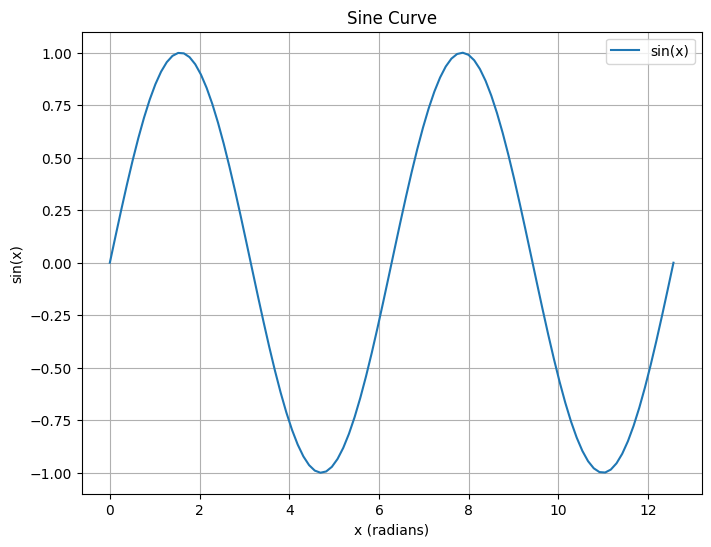

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values (angles in radians)
x = np.linspace(0, 4 * np.pi, 100)  # From 0 to 4*pi (two cycles), 100 points

# Generate y values (sin(x))
y = np.sin(x)

# Create the plot
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(x, y, label='sin(x)')

# Add labels and title
plt.xlabel('x (radians)')
plt.ylabel('sin(x)')
plt.title('Sine Curve')

# Add grid lines
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()